In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('train_data.csv')
df2 = pd.read_csv('test_data.csv')

print(df.shape)
print(df2.shape)

(42000, 785)
(28000, 784)


In [3]:
x = df.drop('label',axis=1)
y = df.label

print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
x = x.reshape((42000,28,28,1))
x.shape

(42000, 28, 28, 1)

In [7]:
x1 = np.array(df2)
x1 = scaler.fit_transform(x1)
x1 = x1.reshape((28000,28,28,1))
x1.shape

(28000, 28, 28, 1)

In [11]:
y = np.array(y)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
y= y.reshape((-1,1))
y = enc.fit_transform(y)

y.shape

(42000, 10)

In [13]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 28, 28, 1)
(33600, 10)
(8400, 28, 28, 1)
(8400, 10)


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [16]:
model = keras.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [17]:
from tensorflow import keras

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=25,
        verbose=1)
]

Epoch 1/20
657/657 [==============================] - 215s 324ms/step - loss: 0.3289 - accuracy: 0.8947 - val_loss: 0.0558 - val_accuracy: 0.9835
Epoch 2/20
657/657 [==============================] - 206s 314ms/step - loss: 0.0947 - accuracy: 0.9737 - val_loss: 0.0759 - val_accuracy: 0.9824
Epoch 3/20
657/657 [==============================] - 213s 324ms/step - loss: 0.0717 - accuracy: 0.9793 - val_loss: 0.0233 - val_accuracy: 0.9925
Epoch 4/20
657/657 [==============================] - 197s 300ms/step - loss: 0.0602 - accuracy: 0.9844 - val_loss: 0.0174 - val_accuracy: 0.9945
Epoch 5/20
657/657 [==============================] - 195s 297ms/step - loss: 0.0506 - accuracy: 0.9857 - val_loss: 0.0152 - val_accuracy: 0.9949
Epoch 6/20
657/657 [==============================] - 186s 284ms/step - loss: 0.0480 - accuracy: 0.9866 - val_loss: 0.0151 - val_accuracy: 0.9948
Epoch 7/20
657/657 [==============================] - 197s 301ms/step - loss: 0.0437 - accuracy: 0.9881 - val_loss: 0.0084 -

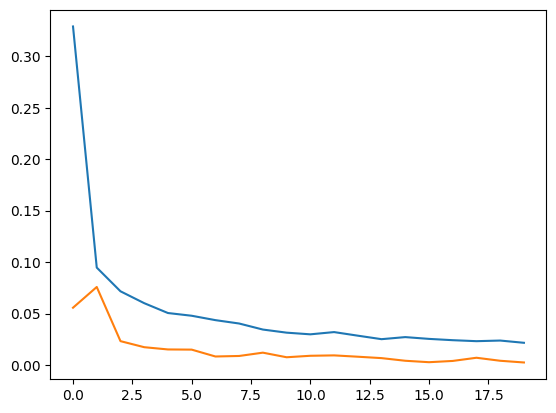

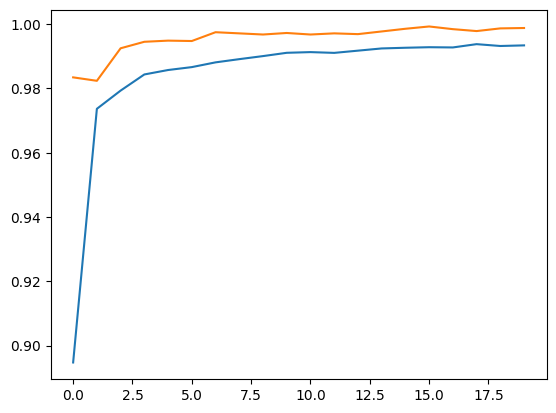

In [18]:
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"])

history = model.fit(x,y,batch_size=64,epochs=20,validation_data=(x_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [19]:
predictions=model.predict(x1)
pre=predictions.argmax(axis=-1)

In [20]:
submission = pd.Series(pre,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.to_csv("final_submission_v1.csv",index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [21]:
prediction=model.predict(x)
pred=prediction.argmax(axis=-1)